# Set up enviroment

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Start

In [3]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [4]:
dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/Eximbank.csv'
df = pd.read_csv(dataset_path, index_col="Date")


In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
3/1/2019,12323.44629,12429.37891,12005.64941,12217.51367,12217.51367,101102
3/4/2019,12217.51367,12711.86426,12146.89258,12570.62109,12570.62109,1698208
3/5/2019,12570.62109,12570.62109,12252.82520,12252.82520,12252.82520,1940443
3/6/2019,12535.31055,12535.31055,12252.82520,12288.13574,12288.13574,40228
3/7/2019,12076.27148,12288.13574,12005.64941,12076.27148,12076.27148,4753044
3/8/2019,12005.64941,12429.37891,12005.64941,12252.82520,12252.82520,234447
3/11/2019,12076.27148,12394.06738,12076.27148,12252.82520,12252.82520,36136
3/12/2019,12252.82520,12500.00000,12252.82520,12500.00000,12500.00000,808790
3/13/2019,12570.62109,12641.24316,12464.68945,12570.62109,12570.62109,1816997


In [6]:
print(f"Data shape: {df.shape}")

Data shape: (1250, 6)


## Data preprocessing

### Checking duplicates and null values

In [7]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [8]:
print("Null")
df.isnull().sum()

Null


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking DataFrame information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 3/1/2019 to 3/1/2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1250 non-null   float64
 1   High       1250 non-null   float64
 2   Low        1250 non-null   float64
 3   Close      1250 non-null   float64
 4   Adj Close  1250 non-null   float64
 5   Volume     1250 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.4+ KB


### Overview Data Descriptive statistic

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03
mean,16589.270059,16863.341922,16318.485446,16613.774022,16613.774022,8.215525e+06
std,4371.975675,4455.160610,4252.104246,4341.284393,4341.284393,1.466744e+07
min,9887.005859,10593.220700,9887.005859,10346.044920,10346.044920,3.426000e+03
25%,12323.446290,12500.000000,12146.892580,12358.756840,12358.756840,7.259828e+05
50%,16603.107420,16822.033200,16355.932620,16596.044920,16596.044920,3.317220e+06
75%,19588.629392,19915.253910,19138.417970,19546.609860,19546.609860,1.061395e+07
max,29661.017580,29943.501950,27824.859380,29661.017580,29661.017580,1.941662e+08


## Linear Regression Model

### Split Data

In [11]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [12]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'EIB__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [13]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [14]:
# train:test 9:1 8:2 7:3
test_ratio = 0.2

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.2
Train:  (1000, 1)
Test:  (250, 1)
      Actual_Price  Predicted_Price
1000   15254.23730     22687.100299
1001   15550.84766     22699.947683
1002   15254.23730     22712.795068
1003   15466.10156     22725.642452
1004   16525.42383     22738.489836
...            ...              ...
1245   18150.00000     25834.709449
1246   18200.00000     25847.556833
1247   18300.00000     25860.404218
1248   18100.00000     25873.251602
1249   18250.00000     25886.098986

[250 rows x 2 columns]
Testing RMSE: 6365.9994416335585
Testing MAPE: 0.3524561841314182
Testing MAE: 6245.667388306022
Next 30 Days:
[25898.94637046 25911.79375474 25924.64113903 25937.48852331
 25950.3359076  25963.18329189 25976.03067617 25988.87806046
 26001.72544474 26014.57282903 26027.42021331 26040.2675976
 26053.11498188 26065.96236617 26078.80975046 26091.65713474
 26104.50451903 26117.35190331 26130.1992876  26143.04667188
 26155.89405617 26168.74144045 26181.58882474 26194.43620902
 26207.28359331 2

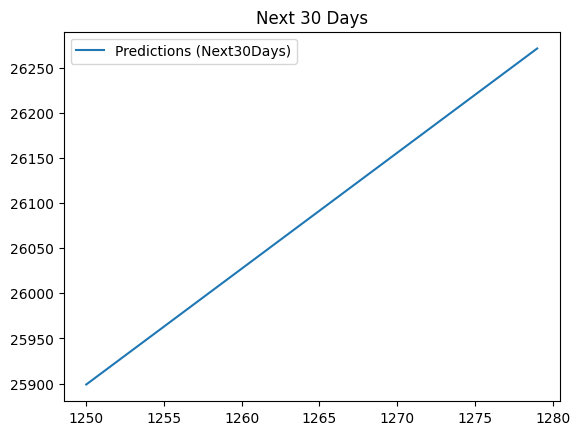

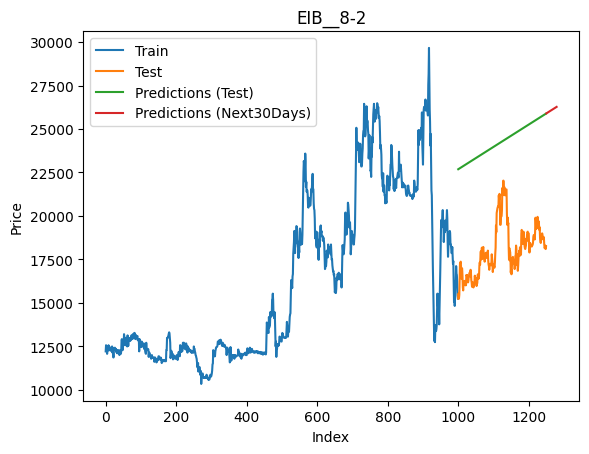

In [15]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))